# 🍷 Red Wine Quality Analysis

Con el siguiente conjuntos de datos aplicaremos Algoritmos de clasificación o regresión. Las clases están ordenadas y no equilibradas (por ejemplo, hay vinos buenos o malos).

# Importing Libraries 

In [ ]:

# For Data Manipulation
import pandas as pd
import numpy as np
import sklearn as s
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from itertools import cycle

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Red neuronal
from tensorflow import keras
from tensorflow.keras import layers

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.exceptions import NotFittedError
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

#Bibliotecas para generar gráficos
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore")

# Loading the dataset

In [ ]:
wine = pd.read_csv('./winequality-red.csv')

<a id = '3.1'></a>
<p style = "font-size : 35px; color :#000080 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #808080; border-radius: 5px 5px;"><strong>Variable Description</strong></p>


<ol>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>fixed acidity : </strong> most acids involved with wine or fixed or nonvolatile (do not evaporate readily) </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>volatile acidity : </strong>the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>citric acid : </strong> found in small quantities, citric acid can add 'freshness' and flavor to wines</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>residual sugar : </strong>the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>chlorides : </strong> the amount of salt in the wine</p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>free sulfur dioxide : </strong> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>total sulfur dioxide : </strong> amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine</p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>density : </strong>the density of water is close to that of water depending on the percent alcohol and sugar content </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>ph : </strong>  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>sulphates : </strong> a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>alcohol sulfur dioxide : </strong> the percent alcohol content of the wine </p> </li>
            <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS" > <strong>quality : </strong> output variable (based on sensory data, score between 0 and 10)</p> </li>

![giphy.gif](https://media.giphy.com/media/ng6NcNAvohN6M/giphy.gif)

# Exploratory Data Analysis (EDA)

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Definir etiquetas de Bueno o malo





In [ ]:
def convert_quali (quality):
    if quality <= 5:
        return 0
    else:
        return 1

Bueno = 1
Malo = 0

In [ ]:
wine["quality_bin"] = wine["quality"].apply(convert_quali)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
features = wine.columns[:-2]
output = wine.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
quality_bin


## Data Splitting

In [ ]:
X = wine[features].values
y = wine[output].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


In [ ]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']


In [ ]:
wine['quality_bin'].value_counts()

1    855
0    744
Name: quality_bin, dtype: int64

# Functions for Analysing Results

## Plot_history en la Red Neuronal


In [ ]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# **Red neuronal**

In [ ]:
X = wine.drop(["quality" ,"quality_bin"] , axis=1)
y = wine['quality_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model =  keras.Sequential([
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dropout(0.3),
     layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
optimizer ="adam",
loss = "binary_crossentropy",
metrics=['accuracy']   
)


In [ ]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), batch_size = 10, epochs = 1000)

Epoch 1/1000
112/112 [==============================] - 1s 3ms/step - loss: 0.9206 - accuracy: 0.5442 - val_loss: 0.6619 - val_accuracy: 0.6146
Epoch 2/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.6095 - val_loss: 0.6565 - val_accuracy: 0.6250
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5952 - val_loss: 0.6567 - val_accuracy: 0.6208
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6095 - val_loss: 0.6468 - val_accuracy: 0.6125
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6166 - val_loss: 0.6374 - val_accuracy: 0.6187
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.6363 - val_loss: 0.6478 - val_accuracy: 0.5896
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6220 - val_loss: 0.6216 - val_accuracy:

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.920592,0.544236,0.661943,0.614583
1,0.690503,0.609473,0.656501,0.625000
2,0.673016,0.595174,0.656670,0.620833
3,0.651315,0.609473,0.646834,0.612500
4,0.647053,0.616622,0.637410,0.618750
...,...,...,...,...
995,0.267080,0.850760,1.495611,0.758333
996,0.291114,0.859696,1.589462,0.718750
997,0.294982,0.849866,1.575219,0.739583
998,0.296007,0.848972,1.564408,0.725000


              precision    recall  f1-score   support

           0       0.83      0.77      0.80       744
           1       0.81      0.87      0.84       855

    accuracy                           0.82      1599
   macro avg       0.82      0.82      0.82      1599
weighted avg       0.82      0.82      0.82      1599

Accuracy: 0.82


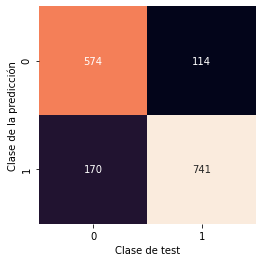

In [ ]:
y_pred = model.predict_classes(X)
# crear matriz de confusión
matrixRedNeuronal= confusion_matrix(y, y_pred) 
# Summary of the predictions made by the classifier
print(classification_report(y, y_pred))
# Accuracy score
print('Accuracy: %.2f' % accuracy_score(y_pred,y))

sns.heatmap(matrixRedNeuronal.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Clase de test')
plt.ylabel('Clase de la predicción');

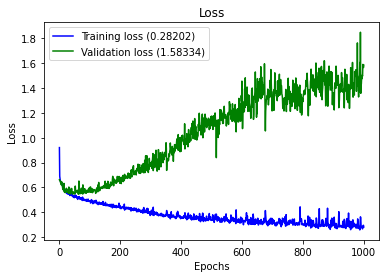

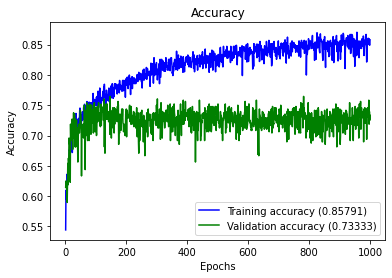

In [ ]:
plot_history(history)

In [ ]:
loss, accuracy = model.evaluate(X_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

35/35 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.8606
Accuracy: 86.06
Loss: 27.10
